In [1]:
import time
import os

from coffea import hist
from coffea.analysis_objects import JaggedCandidateArray
import coffea.processor as processor
from coffea import util
from awkward import JaggedArray
import numpy as np
import glob as glob
import itertools
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
QCD_unweighted = util.load('TTbarResCoffea_QCD_unweighted_output.coffea')
QCD_weighted = util.load('TTbarResCoffea_QCD_weighted_output.coffea')

In [3]:
print("-------QCD Mistag Weighted Cutflow--------")
for i,j in QCD_weighted['cutflow'].items():        
    print( '%20s : %12d' % (i,j) )

-------QCD Mistag Weighted Cutflow--------
          all events :     18455107
         one FatJets :       730025
         two FatJets :       707972
              jet id :       707968
             jet kin :       438639
two FatJets and jet kin :       343714
     >= one oneTTbar :       343714
          dPhi > 2.1 :       179192
                sumw :            0
               sumw2 :            0
             At0bcen :          362
             At0bfwd :          325
             At1bcen :           20
             At1bfwd :           16
             At2bcen :            0
             At2bfwd :            0
             at0bcen :         8473
             at0bfwd :         7505
             at1bcen :          319
             at1bfwd :          254
             at2bcen :            4
             at2bfwd :            5
             0t0bcen :        83587
             0t0bfwd :        76795
             0t1bcen :         2126
             0t1bfwd :         1759
             0t2bc

In [4]:
maindirectory = os.getcwd() 

In [5]:
# ---- Reiterate categories ---- #
ttagcats = ["at", "At", "0t", "1t", "2t"]
btagcats = ["0b", "1b", "2b"]
ycats = ['cen', 'fwd']

list_of_cats = [ t+b+y for t,b,y in itertools.product( ttagcats, btagcats, ycats) ]

# ---- List the Histograms Here ---- #
#list_of_hists = ('ttbarmass', 'jetpt', 'jeteta', 'jetphi', 'jety', 'jetdy', 'probept')
list_of_hists = ['probep', 'numerator', 'denominator']

In [6]:
""" ---------------- Unweighted Data and Unweighted MC Plots (No Mistag Rates Included) ---------------- """

for ihist in list_of_hists:
    for icat in list_of_cats: 
        QCD_hist = QCD_unweighted[ihist].integrate('anacat', icat).integrate('dataset', 'QCD')
        print(ihist, ', ', icat, '\n', QCD_hist.values())

probep ,  at0bcen 
 {(): array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.07819136e-04, 1.39023240e-04, 1.05821459e-04, 7.47512520e-05,
       4.82291048e-05, 3.83986929e-05, 2.66657100e-05, 2.59532275e-05,
       1.75563173e-05, 1.27778319e-05, 9.29310153e-06, 8.10752277e-06,
       5.32894007e-06, 3.96160092e-06, 3.83859368e-06, 3.33545727e-06,
       1.83549244e-06, 1.92399404e-06, 4.55780530e-07, 1.42372047e-06,
       1.28865967e-06, 3.24638407e-07, 4.65712484e-07, 5.50366970e-07,
       1.63691833e-07, 9.21121739e-08, 2.36987717e-07, 1.33905029e-08,
       1.16170185e-08, 5.02041075e-09, 2.11059614e-10, 1.38306859e-08,
       1.88545528e-07, 1.31187683e-09, 1.17910531e-07, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])}
probep ,  at0bfwd 
 {(): array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.

denominator ,  2t0bcen 
 {(): array([1.11125493e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])}
denominator ,  2t0bfwd 
 {(): array([1.5390985e-05, 0.0000000e+00, 0.0000000e

In [7]:
lut_file = maindirectory + '/LookupTables/mistag_QCD_at0bcen.csv'
df = pd.read_csv(lut_file)
mtr = df['M(p)'].values
print(mtr)
MMR = mtr.sum()/mtr.size
print('Mean Mistag Rate (MMR) = ', MMR)
print()

nevts = QCD_unweighted['cutflow']['at0bcen']
bkg_nevts = QCD_weighted['cutflow']['at0bcen']

print('Number of Data =       ', nevts)
print('Number of Background = ', bkg_nevts)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 7.23427093e-02 3.03978567e-02 4.12746118e-02 4.88654422e-02
 6.69146511e-02 5.45690186e-02 2.76629739e-02 4.94702210e-02
 2.60936009e-02 1.69865689e-02 3.31503062e-03 9.50486637e-02
 2.84069460e-02 2.86530524e-02 9.79990444e-02 9.03452975e-03
 1.77848677e-01 1.26284014e-01 2.22883612e-02 1.18235765e-04
 0.00000000e+00 9.34342018e-02 1.05176425e-03 0.00000000e+00
 1.21471105e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
Mean Mistag Rate (MMR) =  0.042385497726209795

Number of Data =        8473
Number of Background =  8473


In [16]:
""" ---------- Comparing Background Estimate to Unweighted MC (TEST WITHOUT DATA/ CLOSURE TEST) ---------- """

for icat, cat in enumerate(['0bcen', '0bfwd', '1bcen', '1bfwd', '2bcen', '2bfwd']): 
    #---- Define Histograms ----# 
    MC_hist_wgt = QCD_weighted['probep'].integrate('anacat', 'at' + cat).integrate('dataset', 'QCD')
    MC_hist_unwgt = QCD_unweighted['probep'].integrate('anacat', 'At'+ cat).integrate('dataset', 'QCD')
    MC_hist_unwgt_pretag = QCD_unweighted['probep'].integrate('anacat', 'at' + cat).integrate('dataset', 'QCD')

    MC_vals_wgt = MC_hist_wgt.values()[()]
    MC_vals_unwgt = MC_hist_unwgt.values()[()]
    MC_vals_unwgt_pretag = MC_hist_unwgt_pretag.values()[()]

    #print(MC_vals_wgt)
    #print(MC_vals_unwgt)
    #hist.plotratio(MC_hist_wgt , MC_hist_unwgt)
    #plt.ylim(-2,2)
    #print(MC_vals_unwgt_pretag)
    print( cat, np.divide( np.abs(MC_vals_unwgt) > 0, MC_vals_wgt / MC_vals_unwgt, 0) )

0bcen [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
0bfwd [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
1bcen [0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
1bfwd [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
2bcen [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
2bfwd [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


<AxesSubplot:xlabel='Jet $p$ [GeV]', ylabel='Counts'>

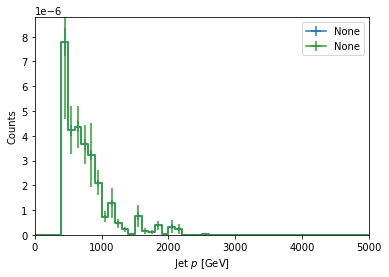

In [12]:

hist.plot1d(MC_hist_wgt)
hist.plot1d(MC_hist_unwgt, clear=False)


In [10]:
nevts = QCD_unweighted['cutflow']['At0bcen']
bkg_nevts = QCD_weighted['cutflow']['at0bcen']

print('Number of Data =       ', nevts)
print('Number of Background = ', bkg_nevts)

Number of Data =        362
Number of Background =  8473
